# Titanic 

### 1. Reference¶
#### Datasets:
In this project I was working with the data set "Titanic Data" from the Udacity website. 

https://www.udacity.com/api/nodes/5420148578/supplemental_media/titanic-datacsv/download?_ga=1.57940330.157342817.1461748645

It contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic.

This link allows to see the description of this dataset on the Kaggle website, where the data was obtained.

https://www.kaggle.com/c/titanic/data

#### Articles:

http://matplotlib.org/examples/pylab_examples/

http://people.duke.edu/~ccc14/pcfb/numpympl/MatplotlibBarPlots.html

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html#pandas.DataFrame.groupby

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient

#### Resources :
Online Statistics Education: An Interactive Multimedia Course of Study.
Project Leader: David M. Lane, Rice University.

http://onlinestatbook.com/2/index.html


### 2. Selection of Tools
#### I choose the IPython notebook, in which case I can submit both the code I wrote and the report of my findings in the same document. 

#### The section below is for the code libraries.

In [70]:
import scipy

In [71]:
import pandas as pd

In [72]:
import numpy as np

In [75]:
%pylab inline
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [76]:
import seaborn as sns

In [77]:
from scipy import stats
from pylab import plot,show

In [78]:
from operator import truediv

In [79]:
def convert_list_to_int(x):
    y =[]
    for element in x:
        el = element[0]
        y.append(el)
    return y

### 3. Analyzing of the data
#### 3.1 Dataset.
#### Let's have a look on the data set and do a basic statistical calculation on it using code.

In [80]:
titanic_df = pd.read_csv('/Users/olgabelitskaya/Downloads/titanic_data.csv')

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### The most interesting variable we could observe here is "Survived". The main question is: what factors made people more likely to survive? Let us investigate them step by step. 
#### I propose to consider whether the number of survivors was dependent on their age, sex, social status (class and fare) or not.

#### The total number of passengers in the sample:

In [81]:
len(titanic_df)

891

#### The number of survivors (including this indicator in percentage) in the sample:

In [82]:
titanic_df['Survived'].sum()

342

In [83]:
100*titanic_df['Survived'].mean()

38.38383838383838

#### 3.2 Pclass
#### Let's find the number of passengers for each class:

In [84]:
pclass = pd.Series(titanic_df['Pclass'])
pclass_list = list(set(pclass.values))
pclass_list

[1, 2, 3]

In [85]:
number_by_pclass = titanic_df.groupby('Pclass').count()['PassengerId']
number_by_pclass_percent = 100*number_by_pclass/len(titanic_df)
number_by_pclass_df = pd.DataFrame(data={'Number by Pclass': number_by_pclass,
                                         'Number by Pclass in percentages':number_by_pclass_percent})
number_by_pclass_df

,Number by Pclass,Number by Pclass in percentages
Pclass,,
1,216,24.242424
2,184,20.650954
3,491,55.106622


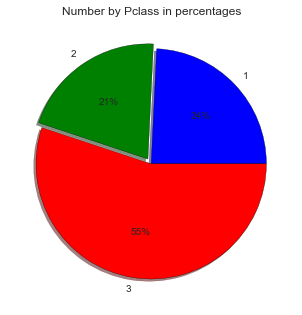

In [86]:
figure(1, figsize=(5,5))
ax = axes([0.1, 0.1, 0.8, 0.8])

labels = '1', '2', '3'
fracs = np.array(number_by_pclass)
explode=(0, 0.05, 0)

pie(fracs, explode=explode, labels=labels,
                autopct='%1.0f%%', shadow=True, startangle=0)
title('Number by Pclass in percentages')
show()

#### And the number of survivors for all classes and the percentage of survivors for each class:

In [87]:
survived_by_pclass = titanic_df.groupby('Pclass').sum()['Survived']
survived_by_pclass_percent1 = 100*titanic_df.groupby('Pclass').sum()['Survived']/titanic_df['Survived'].sum()
survived_by_pclass_percent2 = 100*titanic_df.groupby('Pclass').sum()['Survived']/number_by_pclass
survived_by_pclass_df = pd.DataFrame(data={'Survived by Pclass': survived_by_pclass,
                                         'Survived by Pclass in percentages I':survived_by_pclass_percent1,
                                          'Survived by Pclass in percentages II':survived_by_pclass_percent2,})
survived_by_pclass_df

,Survived by Pclass,Survived by Pclass in percentages I,Survived by Pclass in percentages II
Pclass,,,
1,136,39.766082,62.962963
2,87,25.438596,47.282609
3,119,34.795322,24.236253


#### The variable "Survived by Pclass in percentages I" determines the percentage of passengers who survived in this class in relation to the total number of survivors.
#### The variable "Survived by Pclass in percentages II" determines the percentage of passengers who survived in this class in relation to the total number of passengers in this class.

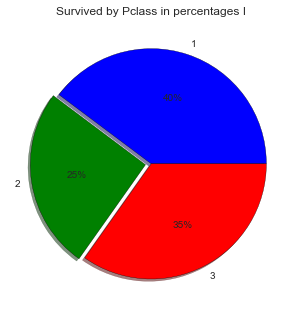

In [88]:
figure(1, figsize=(5,5))
ax = axes([0.1, 0.1, 0.8, 0.8])

labels = '1', '2', '3'
fracs = np.array(survived_by_pclass)
explode=(0, 0.05, 0)

pie(fracs, explode=explode, labels=labels,
                autopct='%1.0f%%', shadow=True, startangle=0)
title('Survived by Pclass in percentages I')
show()


#### A certain tendency is immediately detected: the higher class of passengers (the lower number of the class), the greater percentage of passengers who survived in  this class in relation to the total number of passengers in this class.

#### In this situation we can use the Pearson product-moment correlation coefficient as a measure of the strength of the linear relationship between two variables. Looking at the data, it can be assumed that between the independent variable "Pclass" and the dependent variable "Survived by Pclass in percentages II" there is a negative linear relationship.

[1 2 3]
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived by Pclass in percentages II, dtype: float64
|     slope        |        r            |   standard deviation   |
|                  |                     |                        |
|  -19.3633552086  |    -0.994024355227  |      2.12638158486     |


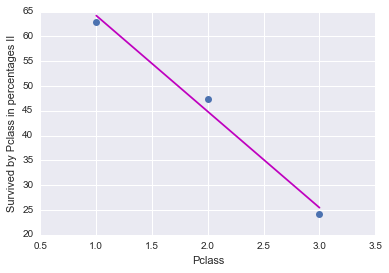

In [89]:
x = np.array(pclass_list)
print x
y = pd.Series(survived_by_pclass_df['Survived by Pclass in percentages II']) 
print y
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

print '|     slope        |        r            |   standard deviation   |'
print'|                  |                     |                        |'
print'| ', slope, " |   ", r_value, " |     ", std_err,'    |'

line = slope*x+intercept
plot(x,line,'m-',x,y,'o')
pylab.xlim([0.5,3.5])
pylab.xlabel('Pclass')
pylab.ylabel('Survived by Pclass in percentages II')
show()

#### This picture and the calculations show a plot for which Pearson's r = -0.994024355227. It's extremly close to r = -1, so the relationship between the variable "Pclass" and the variable "Survived by Pclass in percentages II" is a strong negative linear regression.

#### 3.3 Fare
#### Let us investigate possible links between the variable "Fare" and other indicators.
#### We can guess that the lower the price of the ticket, the more passengers on board with a ticket at this price. It's also easy to assume that the cost of travel depends on the class. Therefore (bearing in mind paragraph 3.2) it's possible to detect the relationship between the number of survived people and the cost of their tickets.

#### 3.3.1 At first, we can find the average fare for passengers of each class.

In [90]:
fare_mean_by_class = titanic_df.groupby('Pclass').mean()['Fare']
fare_mean_by_class

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

#### The calculations below show a plot for which Pearson's r = -0.907494151378. It's enough close to r = -1, so the relationship between the independent variable "Pclass" and the dependent variable "Fare mean by class" is a strong negative linear regression.

|     slope        |        r            |   standard deviation   |
|                  |                     |                        |
|  -35.2395686991  |    -0.907494151378  |      16.3118400022     |


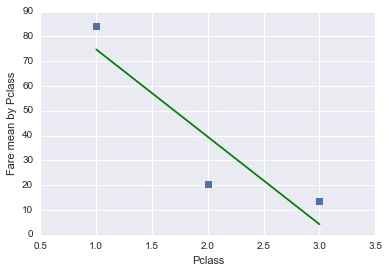

In [91]:
x = np.array(pclass_list)
y = pd.Series(fare_mean_by_class) 

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

print '|     slope        |        r            |   standard deviation   |'
print'|                  |                     |                        |'
print'| ', slope, " |   ", r_value, " |     ", std_err,'    |'

line = slope*x+intercept
plot(x,line,'g-',x,y,'s')
pylab.xlim([0.5,3.5])
pylab.xlabel('Pclass')
pylab.ylabel('Fare mean by Pclass')
show()

#### 3.3.2 For the next analisis all the passengers had been divided into categories depending on the fare with the difference approximately equal to 10 units.

In [92]:
number_by_fare = pd.Series(titanic_df['Fare'])
print 'max(number_by_fare)=', max(number_by_fare)

max(number_by_fare)= 512.3292


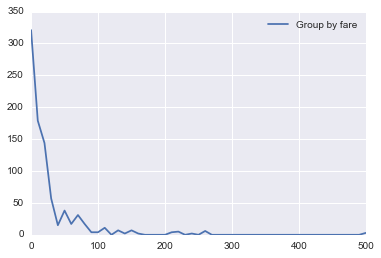

In [93]:
bins1 = np.linspace(number_by_fare.min(), number_by_fare.max(), 52)
groups = number_by_fare.groupby(pd.cut(number_by_fare, bins1)).count()
groups1 = groups.tolist()

index1 = [i for i in range(0,510) if i%10 == 0]

groups_df = pd.DataFrame(data={'Group by fare': groups1}, index=index1)

groups_df.plot()

#### Let us exclude outliers. First 26 groups include the majority of passengers, the remaining groups - only three people.

In [94]:
groups0 = groups1[:27]
index0 = index1[:27]

number_in_rest = sum(groups1[27:])
print number_in_rest

3


|     slope        |        r            |   standard deviation   |
|                  |                     |                        |
|  -0.558913308913 |    -0.617051133707  |     0.142556020365     |


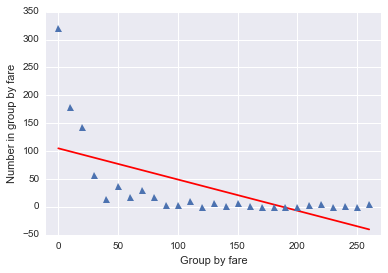

In [95]:
x = np.array(index0)
y = np.array(groups0) 

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

print '|     slope        |        r            |   standard deviation   |'
print'|                  |                     |                        |'
print'| ', slope, "|   ", r_value, " |    ", std_err,'    |'

line = slope*x+intercept
plot(x,line,'r-',x,y,'^')
pylab.xlim([-10,270])
pylab.xlabel('Group by fare')
pylab.ylabel('Number in group by fare')
show()

#### In this case Pearson's r = -0.617051133707. It's not so close to r = -1, so the relationship between the independent variable "Group by fare" and the dependent variable "Number in group by fare" is a weak negative relationship.

#### 3.3.3 Let us have a look at the variable "Fare" and the variable "Survived".
#### As in the paragraph 3.3.2 passengers had been divided into several dozen categories according to the price of the ticket and the number of survivors in each category was counted. Outliers were also excluded.

In [96]:
survived_by_fare = titanic_df.groupby('Fare').sum()['Survived']
survived_groups_df = pd.DataFrame(data={'Survived by fare': survived_by_fare})

In [97]:
survived_groups_df.reset_index(inplace=True)

In [98]:
survived_groups = survived_groups_df.groupby(pd.cut(survived_groups_df["Fare"], bins1)).sum()

survived_groups1 = survived_groups.fillna(0)

survived_groups2 = survived_groups1['Survived by fare'][:27].tolist()
survived_groups2 = [int(x) for x in survived_groups2]


fare_groups_df = pd.DataFrame(data={'Number by group': groups0, 'Survived by group': survived_groups2}, index=index0)
fare_groups_df.head()

,Number by group,Survived by group
0,321,66
10,179,76
20,144,64
30,57,22
40,15,4


In [99]:
m = np.array(survived_groups2)
n = np.array(groups0)

survived_groups_in_percentages0 = 100.0*np.true_divide(m,n)
survived_groups_in_percentages1 = pd.Series(survived_groups_in_percentages0).fillna(0)

|     slope        |        r            |   standard deviation   |
|                  |                     |                        |
|  -0.0689445193963  |    -0.157400468005  |    0.0865119614025   |


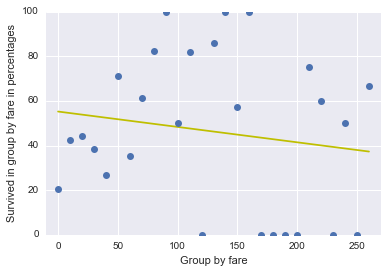

In [100]:
x = np.array(index0)
y = np.array(survived_groups_in_percentages1)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

print '|     slope        |        r            |   standard deviation   |'
print'|                  |                     |                        |'
print'| ', slope, " |   ", r_value, " |   ", std_err,'  |'

line = slope*x+intercept
plot(x,line,'y-',x,y,'o')
pylab.xlim([-10,270])
pylab.xlabel('Group by fare')
pylab.ylabel('Survived in group by fare in percentages')
show()

#### In this case Pearson's r = -0.157400468005. It's enough close to r = 0, so between the independent variable "Group by fare" and the dependent variable "Survived in group by fare in percentages" there is no relationship.

#### 3.4 Sex

In [101]:
number_by_sex = titanic_df.groupby('Sex').count()['PassengerId']
number_by_sex_in_percentages = 100*titanic_df.groupby('Sex').count()['PassengerId']/len(titanic_df)

In [102]:
survived_by_sex = titanic_df.groupby('Sex').sum()['Survived']
survived_by_sex_in_percentages1 = 100*titanic_df.groupby('Sex').sum()['Survived']/titanic_df['Survived'].sum()
survived_by_sex_in_percentages2 = 100*titanic_df.groupby('Sex').sum()['Survived']/number_by_sex

In [103]:
survived_by_sex_df = pd.DataFrame(data={'Number by sex': number_by_sex,
                                        'Number by sex in percentages':number_by_sex_in_percentages,
                                        'Survived by sex':survived_by_sex,
                                        'Survived by sex in percentages I':survived_by_sex_in_percentages1,
                                        'Survived by sex in percentages II':survived_by_sex_in_percentages2})
survived_by_sex_df

,Number by sex,Number by sex in percentages,Survived by sex,Survived by sex in percentages I,Survived by sex in percentages II
Sex,,,,,
female,314,35.241302,233,68.128655,74.203822
male,577,64.758698,109,31.871345,18.890815


#### The variable "Survived by sex in percentages I" determines the percentage of survived passengers of this sex in relation to the total number of survivors.
#### The variable "Survived by sex in percentages II" determines the percentage of survived passengers of this sex in relation to the total number of passengers of the same sex.

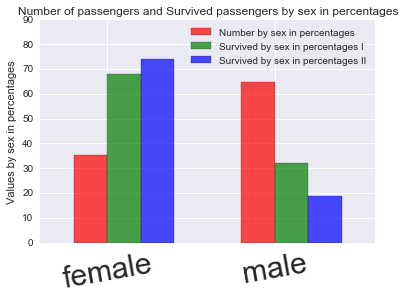

In [104]:
fig = plt.figure()
ax = fig.add_subplot(111)

## the data
Number_by_Sex_in_percentages = pd.Series(survived_by_sex_df['Number by sex in percentages'])
Survived_by_Sex_in_percentages1 = pd.Series(survived_by_sex_df['Survived by sex in percentages I'])
Survived_by_Sex_in_percentages2 = pd.Series(survived_by_sex_df['Survived by sex in percentages II'])

## necessary variables
ind = np.array([1,2])           # the x locations for the pclass
width = 0.2     # the width of the bars

## the bars
rects1 = ax.bar(ind, Number_by_Sex_in_percentages, width, color='red', alpha = 0.7)
rects2 = ax.bar(ind+width, Survived_by_Sex_in_percentages1, width, color='green', alpha = 0.7)
rects3 = ax.bar(ind+2*width, Survived_by_Sex_in_percentages2, width, color='blue', alpha = 0.7)

# axes and labels
ax.set_xlim(-width+1,len(ind)+width+0.6)
ax.set_ylim(0,90)
ax.set_ylabel('Values by sex in percentages')
ax.set_title('Number of passengers and Survived passengers by sex in percentages')
xTickMarks = ['female','male']
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=10, fontsize=30)

## add a legend
ax.legend((rects1[0], rects2[0], rects3[0]), 
          ('Number by sex in percentages', 'Survived by sex in percentages I', 'Survived by sex in percentages II') )
plt.show()

#### We can clearly see the tendency: female passengers were more likely to survive in this instance.

#### 3.5 Age

#### Let us divide passengers into age categories and estimate the number of survivors in each of them. In this analysis, we do not count the passengers whose age is unknown.

In [105]:
age = pd.cut(titanic_df['Age'], [0,13,19,35,60,85], labels=['child', 'teenager', 'young','middle-aged','old'])
df_age = pd.DataFrame(data={'Age category': age,'Survived': titanic_df['Survived']})
number_by_age = df_age.groupby('Age category').count() 
number_by_age1 = number_by_age.values.tolist()
survived_by_age = df_age.groupby('Age category').sum()
survived_by_age1 = survived_by_age.values.tolist()
survived_by_age_in_percentages = 100*survived_by_age/number_by_age
survived_by_age_in_percentages1 = survived_by_age_in_percentages.values.tolist()

In [106]:
df_survived_by_age = pd.DataFrame(data={'Number by age category': convert_list_to_int(number_by_age1),
                                        'Survived by age category': convert_list_to_int(survived_by_age1),
                                        'Survived by age category in percentages': convert_list_to_int(survived_by_age_in_percentages1)},
                                 index=['child', 'teenager', 'young','middle-aged','old'])
df_survived_by_age

,Number by age category,Survived by age category,Survived by age category in percentages
child,71,42,59.154930
teenager,93,37,39.784946
young,333,128,38.438438
middle-aged,195,78,40.000000
old,22,5,22.727273


#### We assign each age category ['child', 'teenager', 'young','middle-aged','old'] the corresponding number [1, 2, 3, 4, 5] and analyze the dependence of the variable "Survived by age category in percentages" on the variable "Age category".

|     slope        |        r            |   standard deviation   |
|                  |                     |                        |
|  -7.26402599369  |    -0.888941929837  |      2.16086549863     |


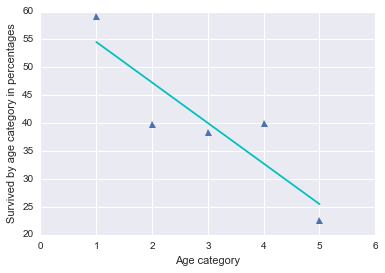

In [107]:
x = np.array([1, 2, 3, 4, 5])
y = convert_list_to_int(survived_by_age_in_percentages1) 

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

print '|     slope        |        r            |   standard deviation   |'
print'|                  |                     |                        |'
print'| ', slope, " |   ", r_value, " |     ", std_err,'    |'

line = slope*x+intercept
plot(x,line,'c-',x,y,'^')
pylab.xlim([0,6])
pylab.xlabel('Age category')
pylab.ylabel('Survived by age category in percentages')
show()

#### The calculations above show a plot for which Pearson's r = -0.888941929837. It's enough close to r = -1, so the relationship between the independent variable "Age category" and the dependent variable "Survived by age category in percentages" is a strong negative linear regression.

### 4. Сonclusion


#### So, a strong negative linear relationship was found between the following pairs of variables:
#### 1) the independent variable "Pclass" and the dependent variable "Survived by Pclass in percentages II" (the percentage of passengers who survived in this class in relation to the total number of passengers in this class);
#### 2) the independent variable "Pclass" and the dependent variable "Fare mean by Pclass" (the average fare for passengers in this class);
#### 3) the independent variable "Age category" and the dependent variable "Survived by age category in percentages" (the percentage of passengers who survived in the age category in relation to the total number of passengers in this age category.
#### The revealed strong connections suggest that first-class passengers and children were more likely to survive.

#### A weak negative correlation was found between the independent variable "Group by fare" and the dependent variable "Number in group by fare". According to the graph, the relationship is unlikely to be linear.
#### However, we can say for sure: fewer the cost of the ticket, greater the number of passengers in this category of tickets.

#### The relationship was not found between the independent variable "Group by fare" and the dependent variable "Survived in group by fare in percentages" (the percentage of passengers who survived in the group in relation to the total number of passengers in this group).

#### It should be noted that the percentage of survivors of passengers is much higher among women than among men. Perhaps, here analyzing of the dependence nature is not meaningful because the variable "Sex" has only two values.